In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
DEMO = pd.read_csv('./data/LPOINT_BIG_COMP_01_DEMO.csv') 
DEMO

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17
...,...,...,...,...
29908,M999708287,여성,40대,Z10
29909,M999770689,여성,30대,Z16
29910,M999849895,여성,20대,Z04
29911,M999926092,남성,30대,Z08


In [3]:
PRODUCT = pd.read_csv('./data/LPOINT_BIG_COMP_02_PDDE.csv',parse_dates=["de_dt"])
PRODUCT

/var/folders/1r/w554lp_s677_dbwqw3vmnhmh0000gn/T/ipykernel_16007/3571771303.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  PRODUCT = pd.read_csv('./data/LPOINT_BIG_COMP_02_PDDE.csv',parse_dates=["de_dt"])


,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,2021-01-01,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1


In [4]:
COPORATION = pd.read_csv('./data/LPOINT_BIG_COMP_03_COP_U.csv',parse_dates=["de_dt"])
COPORATION

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,2021-10-26,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,2021-11-06,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,2021-02-11,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,2021-09-20,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,2021-10-10,20211010,9,2500
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,2021-11-16,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,2021-11-16,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,2021-12-12,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,2021-11-27,20211127,19,6000


In [5]:
CATEGORY = pd.read_csv('./data/LPOINT_BIG_COMP_04_PD_CLAC.csv')

CATEGORY

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


In [6]:
STORE = pd.read_csv('./data/LPOINT_BIG_COMP_05_BR.csv')

STORE

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005
...,...,...,...,...
8803,E010040,E01,Z17,Z17024
8804,E010041,E01,Z16,Z16005
8805,E010042,E01,Z17,Z17021
8806,E010043,E01,Z10,Z10035


In [7]:
PAY = pd.read_csv('./data/LPOINT_BIG_COMP_06_LPAY.csv',parse_dates=["de_dt"])

PAY

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,2021-08-03,21,10900
1,M216016456,210803130167542,L01,2,2021-08-03,13,6860
2,M205142844,210803140275112,A02,1,2021-08-03,14,9000
3,M737010483,210803040637594,A06,2,2021-08-03,4,36740
4,M707775545,210803140675502,A06,2,2021-08-03,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,2021-01-25,11,51800
353180,M470112503,210104210652271,A06,2,2021-01-04,21,6440
353181,M748878049,210119200278240,A02,1,2021-01-19,20,17600
353182,M748878049,210119180267206,A02,1,2021-01-19,18,12400


In [8]:
len(DEMO)

29913

In [9]:
len(PAY)

353184

In [10]:
#MAN2030_pd.groupby(['cust','pd_c','de_dt'])['buy_am','buy_ct'].mean()


PAY.groupby(['cust','cop_c'])['buy_am'].mean() # 엘페이 사용 고객별 유통사 계열에 쓰는 평균 비용


cust        cop_c
M000136117  A01      902500.000000
            A06      109950.500000
            D01       15100.000000
M000419293  A01       56713.333333
            A02       83500.000000
                         ...      
M999962961  A02        8000.000000
            A03       22130.000000
            A06       60156.666667
            C02       12700.000000
            L00        9156.000000
Name: buy_am, Length: 30268, dtype: float64

In [11]:
PAY.groupby(['cust'])['chnl_dv'].value_counts()  # 엘페이 사용자별 온/오프라인 구매 횟수  1: 오프라인, 2 오프라인

cust        chnl_dv
M000136117  2           3
            1           1
M000419293  2          26
            1          16
M000494848  2          88
                       ..
M999599111  2          77
M999770689  1          74
            2           5
M999962961  1           9
            2           7
Name: chnl_dv, Length: 13051, dtype: int64

In [30]:
#PRODUCT = pd.merge(PRODUCT, CATEGORY, on = 'pd_c', how = 'inner')
#RODUCT = PRODUCT.drop([PRODUCT.columns[13],PRODUCT.columns[14],PRODUCT.columns[15]], axis = 1)
PRODUCT

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1,남성티셔츠,남성의류,남성의류상의
1,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
4,M506355556,A01000107137,1,A01,A010032,PD0290,2021-01-01,15,199000.0,1,남성티셔츠,남성의류,남성의류상의
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M696533418,E06045892016,2,A06,NaN,PD0520,2021-11-15,0,9900.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381739,M696533418,E06045892016,2,A06,NaN,PD0520,2021-11-15,0,9900.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381740,M111856694,E06045887405,2,A06,NaN,PD0520,2021-11-18,0,100.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381741,M001808316,E06045891296,2,A06,NaN,PD0520,2021-11-18,0,100.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스


In [ ]:
#PRODUCT.to_csv('product.csv')

In [32]:
PRODUCT.groupby(['cust','chnl_dv'])['pd_nm'].value_counts()  # 고객별 제품목록 온/오프라인 구매 현황 

cust        chnl_dv  pd_nm        
M000034966  1        가공조미료            3
                     브래지어             3
                     여성베스트            3
                     일반스낵             3
                     감자스낵             2
                                     ..
M999962961  2        여성스웨트셔츠/후드/집업    1
                     여성재킷             1
                     오이               1
                     참외               1
                     파프리카/피망          1
Name: pd_nm, Length: 1673838, dtype: int64

In [33]:
PRODUCT.groupby(['chnl_dv'])['pd_nm'].value_counts()  #전체 제품 구매 온 / 오프라인 구분지어 제품 품목별 구매 수

chnl_dv  pd_nm    
1        일반스낵         94278
         종량제봉투        88584
         일반우유         64521
         기타파티/팬시용품    56412
         국물봉지라면       49085
                      ...  
2        테니스라켓            1
         파충류용품            1
         펀치류              1
         피트니스용품           1
         헤어롤              1
Name: pd_nm, Length: 3280, dtype: int64

In [15]:
len(PAY)  # 페이 사용자가 아닌 페이를 이용한 결제건 수

353184

In [16]:
len(DEMO) # 페이 가입자 

29913

In [17]:
PRODUCT.groupby(['cust','rct_no'])['chnl_dv'].value_counts() #전체 주문건 수

cust        rct_no        chnl_dv
M000034966  A01016688590  1           3
            A01016718167  1           1
            A02357398521  1           6
            A02357415245  1           1
            A02357420240  1           1
                                     ..
M999962961  E02024505549  2          11
            E06002810292  2           1
            E06004609359  2           1
            E06025413888  2           1
            E06035713248  2           1
Name: chnl_dv, Length: 1266589, dtype: int64

In [18]:
PAY.groupby(['cust','rct_no'])['chnl_dv'].value_counts()  # 페이사용자가 제품을 살 경우 온/오프라인 횟수

cust        rct_no           chnl_dv
M000136117  210104110684235  2          1
            210109140124587  1          1
            210926220176038  2          1
            211120000687692  2          1
M000419293  210107230198829  2          1
                                       ..
M999962961  210618180161128  1          1
            210724200025828  2          1
            210819110374913  1          1
            211216170132931  1          1
            211230160237764  1          1
Name: chnl_dv, Length: 353184, dtype: int64

In [19]:
COPORATION.groupby(['rct_no'])['chnl_dv'].value_counts() # 영수증 갯수로 알아본 제휴사 이용 횟수(온/ 오프라인) 

rct_no              chnl_dv
20122713C012328716  2          1
20122900C013317930  2          1
20122911C011862577  2          1
20123009C012921880  2          1
20123012C011060420  2          1
                              ..
21123122E012116298  1          1
21123122E012916542  1          1
21123122E012920649  1          1
21123123D010326849  1          1
21123123E011838053  1          1
Name: chnl_dv, Length: 248304, dtype: int64

In [38]:
# 고객별 쇼핑 품목 평균 금액
PRODUCT.groupby(['cust','pd_nm','de_dt'])['buy_am'].mean() 

cust        pd_nm   de_dt     
M000034966  가공조미료   2021-09-19     3120.0
            간장      2021-09-19     8300.0
            감자스낵    2021-12-23     2180.0
            과일음료    2021-01-16     1200.0
            국산맥주    2021-01-16    10800.0
                                   ...   
M999962961  호주산소우둔  2021-07-24    17800.0
            혼합견과    2021-07-30     2980.0
            혼합잡곡    2021-12-31     7990.0
            화이트와인   2021-11-17    14900.0
                    2021-11-22    15900.0
Name: buy_am, Length: 3644288, dtype: float64

In [48]:
# 전체 판매건에 있어서 엘페이 사용 안한 목록
PRODUCT

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1,남성티셔츠,남성의류,남성의류상의
1,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
4,M506355556,A01000107137,1,A01,A010032,PD0290,2021-01-01,15,199000.0,1,남성티셔츠,남성의류,남성의류상의
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M696533418,E06045892016,2,A06,NaN,PD0520,2021-11-15,0,9900.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381739,M696533418,E06045892016,2,A06,NaN,PD0520,2021-11-15,0,9900.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381740,M111856694,E06045887405,2,A06,NaN,PD0520,2021-11-18,0,100.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381741,M001808316,E06045891296,2,A06,NaN,PD0520,2021-11-18,0,100.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스


In [56]:
# 엘페이 제휴사 아닌 경우의 목록
PAY[PAY['cop_c'] == 'L01']

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
1,M216016456,210803130167542,L01,2,2021-08-03,13,6860
20,M620593844,210803140172063,L01,2,2021-08-03,14,19980
28,M709117634,210803140174654,L01,2,2021-08-03,14,50000
37,M616805034,210803230118632,L01,2,2021-08-03,23,100
49,M154901014,210803100150493,L01,2,2021-08-03,10,2000
...,...,...,...,...,...,...,...
353119,M008269534,210115150103761,L01,2,2021-01-15,15,22000
353120,M008269534,210115150103377,L01,2,2021-01-15,15,12000
353121,M008269534,210110230150807,L01,2,2021-01-10,23,128933
353122,M008269534,210124140185624,L01,2,2021-01-24,14,25500


In [ ]:
#엘페이 가입 고객이나 사용하지 않음


In [61]:
PRODUCT[PRODUCT['rct_no'] == 'A01016688590']

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
124837,M000034966,A01016688590,1,A01,A010045,PD0796,2021-01-16,18,100.0,1,스포츠아대/헤어밴드,스포츠패션,스포츠잡화
183941,M000034966,A01016688590,1,A01,A010045,PD0777,2021-01-16,18,59000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화
183942,M000034966,A01016688590,1,A01,A010045,PD0777,2021-01-16,18,19000.0,1,남성런닝/트레이닝화,스포츠패션,남성스포츠화


In [86]:
#LIST = PRODUCT.groupby(['cust','rct_no','de_dt','pd_c','clac_mcls_nm','pd_nm'])['buy_ct','buy_am'].sum()

LIST1 = PRODUCT.groupby(['cust','rct_no','de_dt','pd_c','clac_mcls_nm'])['buy_ct','buy_am'].sum()






In [66]:
LIST.to_csv('LIST.csv')

In [67]:
PRODUCT

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1,남성티셔츠,남성의류,남성의류상의
1,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
4,M506355556,A01000107137,1,A01,A010032,PD0290,2021-01-01,15,199000.0,1,남성티셔츠,남성의류,남성의류상의
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M696533418,E06045892016,2,A06,NaN,PD0520,2021-11-15,0,9900.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381739,M696533418,E06045892016,2,A06,NaN,PD0520,2021-11-15,0,9900.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381740,M111856694,E06045887405,2,A06,NaN,PD0520,2021-11-18,0,100.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스
4381741,M001808316,E06045891296,2,A06,NaN,PD0520,2021-11-18,0,100.0,1,자동차/레저렌탈,생활/렌탈서비스,렌탈서비스


In [69]:
LIST

buy_ct    buy_am
cust       rct_no       de_dt      pd_c   pd_nm                          
M000034966 A01016688590 2021-01-16 PD0777 남성런닝/트레이닝화          2   78000.0
                                   PD0796 스포츠아대/헤어밴드          1     100.0
           A01016718167 2021-01-16 PD0816 여성런닝/트레이닝화          1   62100.0
           A02357398521 2021-03-25 PD0616 남성팬티                2   17900.0
                                   PD0630 브래지어                3   59700.0
...                                                         ...       ...
M999962961 E02024505549 2021-05-15 PD1441 쌈채소류                1    1180.0
           E06002810292 2021-01-13 PD0959 여성재킷                1  129000.0
           E06004609359 2021-01-22 PD0954 여성스웨터/풀오버           1   34300.0
           E06025413888 2021-04-06 PD0967 여성바지                1   89000.0
           E06035713248 2021-05-03 PD1889 BB/파운데이션/컴팩트류       1   50000.0

[3728554 rows x 2 columns]

In [99]:
PRODUCT['clac_hlv_nm'].nunique()

60

In [75]:
# uir_df = df_year_round.groupby(['CustomerID', 'StockCode'])['InvoiceNo'].nunique().reset_index()
uir_df = PRODUCT.groupby(['cust','pd_c','pd_nm'])['rct_no'].nunique().reset_index()

In [76]:
uir_df

,cust,pd_c,pd_nm,rct_no
0,M000034966,PD0116,김자반/부각/튀각,1
1,M000034966,PD0169,배,1
2,M000034966,PD0178,포도,1
3,M000034966,PD0204,파인애플,1
4,M000034966,PD0218,쿠키,2
...,...,...,...,...
1637596,M999962961,PD1857,샴푸,1
1637597,M999962961,PD1889,BB/파운데이션/컴팩트류,2
1637598,M999962961,PD1896,립글로즈/틴트,1
1637599,M999962961,PD1918,페이셜클렌저,1


In [77]:
uir_df.to_csv('uir.csv')

<AxesSubplot:>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


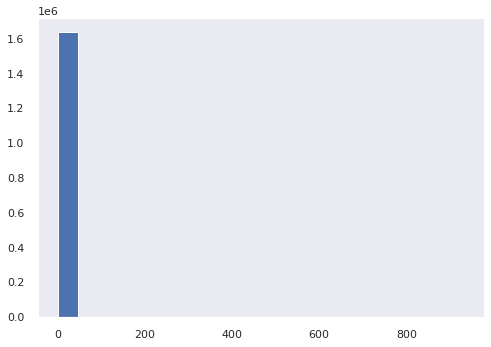

In [78]:
uir_df['rct_no'].hist(bins=20, grid=False)

<AxesSubplot:>

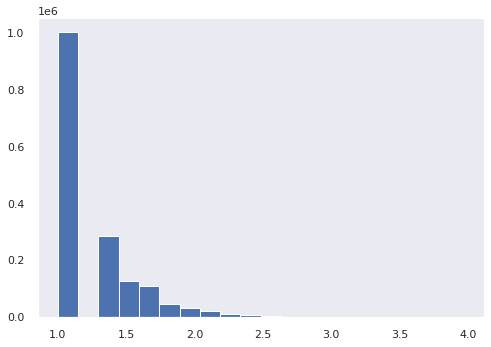

In [79]:
uir_df['rct_no'].apply(lambda x: np.log10(x)+1).hist(bins=20, grid=False)

<AxesSubplot:>

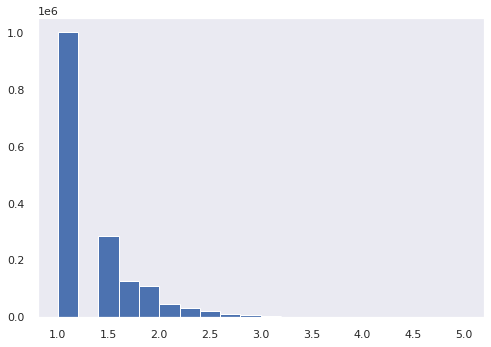

In [80]:
uir_df['Rating'] = uir_df['rct_no'].apply(lambda x: np.log10(x)+1)
uir_df['Rating'] = ((uir_df['Rating']- uir_df['Rating'].min()) / (uir_df['Rating'].max() - uir_df['Rating'].min()) * 4) + 1
uir_df['Rating'].hist(bins=20, grid=False)

uir_df = uir_df[['cust','pd_c','Rating']]
uir_df.head()

In [82]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

ModuleNotFoundError: No module named 'surprise'

In [85]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 1.5 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/narihwang/opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/1r/w554lp_s677_dbwqw3vmnhmh0000gn/T/pip-install-iwtfn2u4/scikit-surprise_e5c6a879a08e4409a4cc78afb28cefce/setup.py'"'"'; __file__='"'"'/private/var/folders/1r/w554lp_s677_dbwqw3vmnhmh0000gn/T/pip-install-iwtfn2u4/scikit-surprise_e5c6a879a08e4409a4cc78afb28cefce/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/1r/w554lp_s677_dbwqw3vmnhmh0000gn/T/pip-wheel-eb4gcnz7
       cwd: /private/var/folders/1r/w554lp_s677_dbwqw3vmnhmh0000gn/T/pip-install-iwtfn2u4/scikit-surprise_e5c6a87

In [ ]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성한다. 대략적인 성능을 알아보기 위해 학습 데이터와 테스트 데이터를 8:2로 분할한다.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['cust', 'pd_c', 'Rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)